In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# Remember what this line did?
%matplotlib inline  
import math 

# the library we will use to create the model 
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [0]:
dataset=pd.read_csv("father_son_heights.csv")

In [0]:
x = dataset['Father'].values.reshape(-1,1)
y = dataset['Son'].values.reshape(-1,1)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

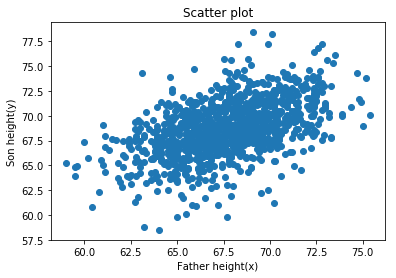

In [0]:
plt.scatter(x,y)
plt.title('Scatter plot')
plt.xlabel('Father height(x)')
plt.ylabel('Son height(y)')
fig=plt.gcf()
plt.show()
fig2.savefig('/users/saanidhi/Desktop/gradiebtdescentscatter.png')

In [0]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 

In [0]:
mini_batches=create_mini_batches(x_train,y_train,1078)

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_model=SGDRegressor(max_iter=5000,tol=1e-3,eta0=2,loss="huber",early_stopping=False)
for minibatch in mini_batches:
  x_mini, y_mini = minibatch 
  y_mini=y_mini.ravel()
  sgd_model.partial_fit(x_mini,y_mini)
from sklearn.metrics import r2_score, mean_squared_error
y_pred=sgd_model.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt((np.sum(np.square(y_test-y_pred)))/1076))

-0.8616954871517799
12.822614766593711
43.29316457611712


In [0]:
z=(np.linspace(min(x),max(x),50)).reshape(-1,1)
ypred=sgd_model.predict(z)

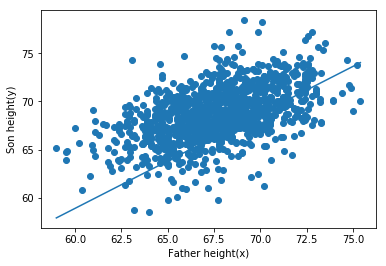

In [0]:
plt.scatter(x,y)
plt.xlabel('Father height(x)')
plt.ylabel('Son height(y)')
plt.plot(z,ypred)
fig2=plt.gcf()
plt.show()

In [0]:
#printing and writing coefficient and intercept values onto a text file
print('Predicted coeffient value is:' ,sgd_model.coef_)

print('Predicted intercept value is:', sgd_model.intercept_)

Predicted coeffient value is: [0.98088486]
Predicted intercept value is: [0.06532175]


In [0]:
print(np.sum(y_test-y_pred))
print(np.square(np.sum(y_test-y_pred)))
print(np.sum(np.square(y_test-y_pred)))


242262.19005544396
58690968730.46005
2016744.754539884


In [0]:
count=0
for i in y_test:
  count+=1
print(count)

324
